In [1]:
import numpy as np
import math
import scipy.interpolate
from matplotlib import pyplot
import matplotlib
import seaborn as sns

In [2]:
def MD(pos, vel, force, nstep, tstep):
    
    position, velocity = [],[]
    
    for i in range(nstep):
        vel+=tstep/2.*force/mass
        pos+=vel*tstep
        force=-k*pos  -pos**3*alpha -pos**2*lamda

        vel+=tstep/2.*force/mass
    
        velocity.append(vel)
        position.append(pos)
        
    return(position, velocity)

In [3]:
k=1.; mass=1.; alpha=1.; lamda = 1.
nn=20; nstep=2**nn; tstep=0.001

pos_array=np.linspace(0.0, 5.0,100); 
t = np.arange(0. ,nstep*tstep, tstep)

print(len(pos_array))

e = np.zeros(len(pos_array))
x = np.zeros(len(pos_array))

for i in range(len(pos_array)):
    
    pos = pos_array[i]; vel=0; force=0
    
    e[i] = (1./2.)*k*pos_array[i]**2 + (1./3.) *lamda*pos_array[i]**3 + (1./4.)*alpha*pos_array[i]**4
    
    p,v = MD(pos, vel, force, nstep, tstep)
    
    x[i] = np.mean(p)

100


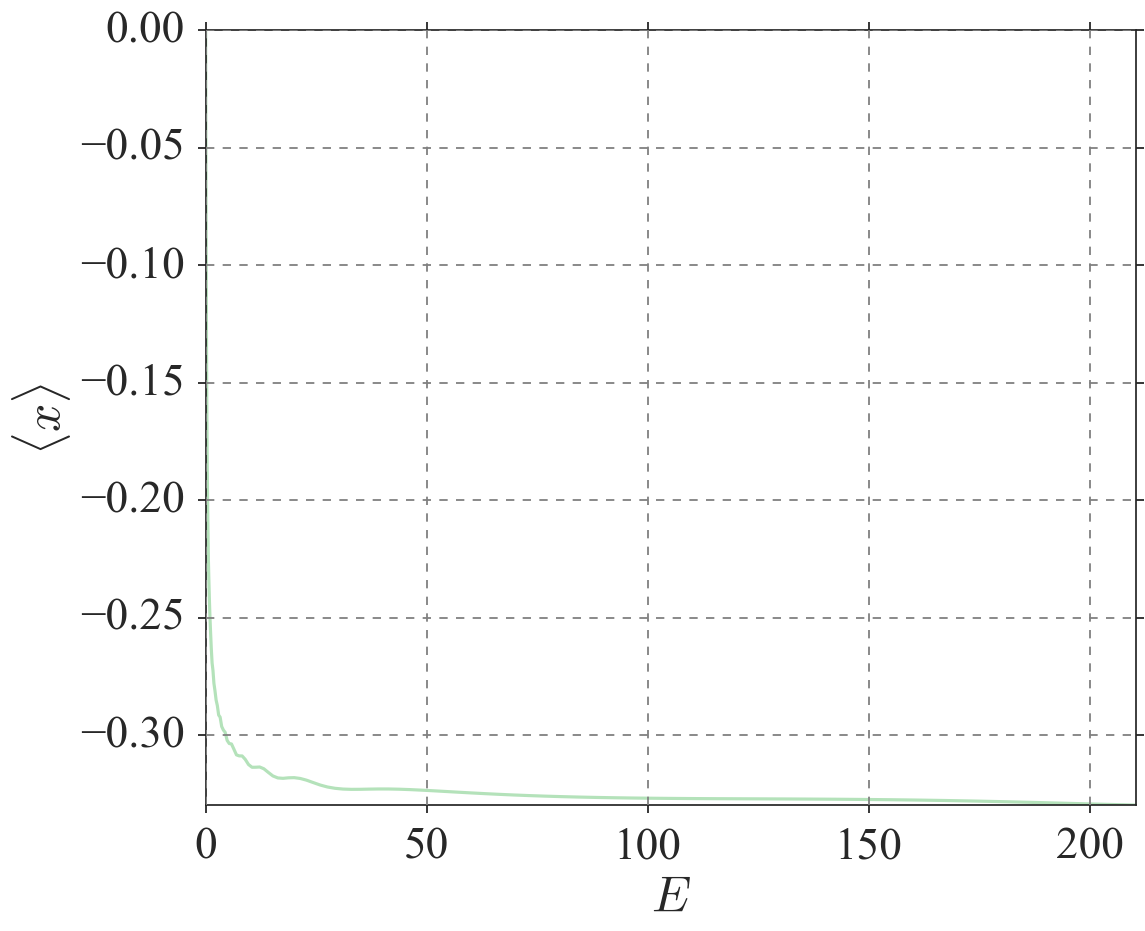

In [4]:
%matplotlib inline

sns.set_style("ticks", {'font.family': 'Times New Roman','axes.axisbelow': False,'grid.linestyle': u'--', 'grid.color': '.5', 'legend.frameon': True})

sns.set_palette(sns.color_palette('GnBu', n_colors=2))

x_start, x_end = e.min(),e.max()
y_start, y_end = x.min(),x.max()

pyplot.figure(1)
sns.set_context("talk", font_scale=2.5)
pyplot.figure(figsize=(12, 10))
pyplot.grid(True)
pyplot.xlabel(r'$E$')
pyplot.ylabel(r'$\langle x \rangle$')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(e, x, linestyle='solid')
pyplot.savefig('2c.pdf', dpi=300, bbox_inches='tight');